### 5. 데이터의 전처리

* 결손값(NaN, Null)을 변환해줘야 함.
* 그러나 상황에 따라 피처값중 Null값이 얼마 없다면 피처값의 평균값으로 대체할 수 있지만 Null이 대부분이라면 해당 피처는 드랍하는게 낫다.

+) 사이킷런의 머신러닝 알고리즘은 문자열을 입력값으로 허용하지 않아 숫자형으로 변환되야함. 문자열 피처에는 일반적으로 카테고리형과 텍스트형이 있음. 
텍스트형은 피처 벡터화를 해주거나 불필요하다면 삭제하는게 좋음. 불필요 경우로는 주민번호나 단순 문자가 있는데 이런 식별자 피처는 데이터 로우를 식별하는 용도로 사용되어 예측에 중요한 요소가 아님. 그래서 알고리즘을 오히려 복잡하게 만들고 예측 성능을 저하시켜 삭제하는게 좋음

#### 데이터 인코딩
인코딩 방식에는 레이블 인코딩과 원핫 인코딩이 있음
* 레이블 인코딩: 

  * 문자열 값을 숫자영 카테고리 값으로 변환하는 방식. 예를들어 TV:1, 냉장고:2 주의할 점은 '01', '02'와 같은 코드 값 역시 문자열이므로 1, 2와 같은 숫자형 값으로 변환돼야 함. 위에서 말하듯 사이킷런의 머신러닝 알고리즘은 문자열을 값을 허용안해 숫자형으로 바꿔야함. 
  * 사이킷런의 레이블 인코딩은 LabelEncoder 클래스로 구현함.

In [128]:
from sklearn.preprocessing import LabelEncoder
items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


+) 메서드 fit()의 역할이 많은데 우선 지도학습에서 특정 레이블을 예측하기 전에 데이를 학습시키기 위해 사용, 데이터 전처리 과정에서 사이킷런을 통해 데이터를 변환하는 대부분의 로직에서 fit은 transform과 함께 사용됨. fit()은 학습 데이터 세트에서 변환을 위한 기반을 설정하는 단계이고, transform()은 fit()에서 저장한 설정값들을 기반으로 데이터를 변환하는 메세드임. 

+) fit_transform()은 training data에만 사용되고 왜 transfrom은 test data에만 사용하는 됨. test data는 모델이 학습된 후에 평가할 때만 사용되어야 하는데 fit_transform을 test data에도 하게 된다면 모델의 성능을 평가할 수 없기 때문.

In [129]:
print('인코딩 클래스',encoder.classes_)

인코딩 클래스 ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [130]:
#classes_속성은 0번부터 순서대로 변환된 인코딩 값에 대한 원본값을 가지고 있음
#질문: 가나다 순임?? 

print('디코딩 원본값:', encoder.inverse_transform([4,5,1,1,0,2,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '냉장고' '냉장고' 'TV' '믹서' '선풍기']


* 원핫 인코딩: 

  * 나와있는 피처만큼 행 만들고 해당 행에서 고유값을 나타내는 칼럼에만 1, 나머지는 0을 표시. 기존의 행으로 구성되 있는것을 열형태로 변환해주는 것임. 칼럼이란게 레이블 종류임.
  * 숫자는 크고 작음에 대한 특성이 있어 레이블 인코딩시 몇몇 ml알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식할 가능성으로 예측 성능이 떨어질수 있음. (트리 게열 ml알고리즘 제외:: 숫자의 특성 비교 안해서) 이러한 레이블 인코딩의 단점을 보완한게 원핫 코딩 

In [131]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

#먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환합니다.
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)

#2차 데이터로 변환합니다.
labels=labels.reshape(-1,1)

#원-핫 인코딩을 적용합니다.
oh_encoder=OneHotEncoder()
oh_encoder.fit(labels)
oh_labels=oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

#위의 결과를 통해 8개의 레코드와 1개의 칼럼을 가진 원본 데이터가 8개의 레코드와 6개의 칼럼으로 가진 데이터로 변환됨.
#oh_labels이 sparse matrix이므로, 내용을 보기위해서 toarray() 메서드 사용

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [132]:
oh_labels

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [133]:
#질문이 레이블 인코딩에서 크기비교를 하는 숫자의 특성때문에 몇몇 ml알고리즘에서 가중치가 더 부여되거나 더 중요하게 
#인식할 가능성으로 예측 성능이 떨어질수 있다고 했는데 그럼, 원-핫 인코딩 전에 레이블 인코딩해도 성능이 떨어지는 것은 아닌지?

In [134]:
import pandas as pd

df=pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
df

,item
0,TV
1,냉장고
2,전자레인지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [135]:
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


#### 피처 스케일링과 정규화

* 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링 이라고 한다. 대표적인 방법으로 표준화와 정규화가 있다. 표준화는 데이터의 피처 각각 평균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환하는 것을 의미. 정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해 주는 것임. 0~1사이의 값으로. 속도와 거리로 서로 다른 피처의 크기를 통일하기 위해 0~1 사이의 값으로 변환함. 참고로 아래의 xi_new는 모두 다른 의미임.

[피처 스케일링]
-일반적인 표준화: xi_new=(xi-mean(x))/stdev(x) 
-정규화: xi_new=(xi-min(x))/(max(x)-min(x))
  
[벡터 정규화]
-사이킷런에서 선형대수의 정규화 (피처가 세개일때): xi_new=xi/((xi^2+yi^2+zi^2)^0.5)
* 정규화가 저거 뜻하는거 맞겠지?

#### StandardScaler

* 표준화를 쉽게 지원하기 위한 클래스임. 각각의 피처를 평균이 0이고 분산이 1인 값으로 변환해줌(가우시안 정규분포)

+) 사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡트 머신이나 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됬기에 사전에 표준화를 적용하는 것이 예측 성능 향상에 중요한 요소가 될수 있음.

In [136]:
from sklearn.datasets import load_iris
import pandas as pd

#붓꽆 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

#var이 분산을 나타내는 약어

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [137]:
from sklearn.preprocessing import StandardScaler 

#StandardScaler객체 생성
scaler=StandardScaler()
#StandardScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray 이므로 반환돼 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

#아래 결과와 같이 모든 칼럼 값의 평균이 0에 아주 가까운 값, 분산은 1에 가까운 값으로 변환됨을 알 수 있다.
#망충한 질문인데,, -1.690315e-15<-얘가 0이랑 가가운거야?? 최소 -15아님?? 둘다 (-)부호잖어..?

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### MinMaxScaler

* 데이터값을 0과 1사이의 범위 값으로 변환함.(음수 값이 있으면 -1에서 1로 변환함)

* 질문이 데이터 분포가 가우시안 분포가 아닌경우 MinMaxScaler을 적용할수 있다는데, 가우시안 이면 평균이 1이니까 이부분을 충족 못시켜서 가우시안 일때 쓰면 안된다는 건가?

In [138]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler객체 생성
scaler=MinMaxScaler()

#MinMaxScaler로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray이므로 반환돼 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature 들의 최댓값')
print(iris_df_scaled.max())

#모든 피처에서 0~1사이 값으로 변환되는 스케일링이 적용됬음을 알 수 있다.

feature 들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 6.타이타닉으로 생존자 예측하기

In [39]:
!pip install matplotlib
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

titanic_df = pd.read_csv('./train.csv')
titanic_df.head(3)

#Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
#Matplotlib는 파이썬에서 데이터를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [42]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())
#DataFrame의 info()메서드를 통해 각 전체 행 수, 컬럼에 대한 정보, 결측치 있는지 없는지, 데이터 타입, 메모리 사용량 등을 확인함.
#RangeIndex는 DataFrame 인덱스의 범위를 나타내 전체 행의 개수를 알수 있음. 
#칼럼 수는 12개, 2개의 칼럼이 float64 타입, 5개의 칼럼이 object타입임. 


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [43]:
#사이킷런 머신러닝 알고리즘은 Null값을 허용하지 않아 DataFrame의 fillna()함수를 사용해 Null값을 평균 또는 고정 값으로 변경.

titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [44]:
# 문자열로 남은 피처들의 값 분류하기

print(' Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic_df['Embarked'].value_counts())

 Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [45]:
#Cabin(선실)의 등급별 생존자가 중요하기에 Cabin의 앞자리를 추출해보자

titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [46]:
#성별이 생존확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수를 비교해 보자.

titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()
#survived 0은 사망, 1은 생존이다.

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

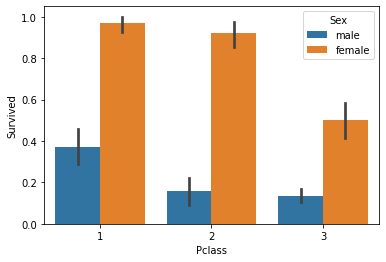

In [47]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

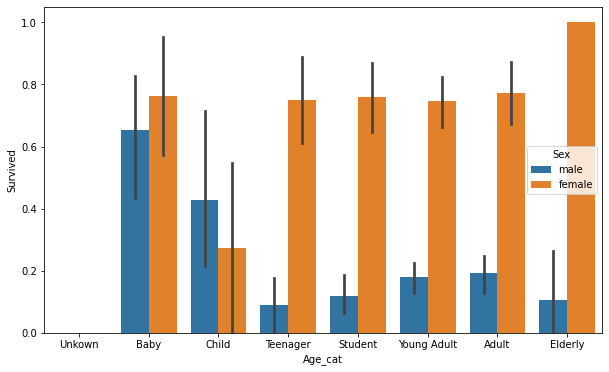

In [48]:
#Age에 따른 생존확률 알아보자.
#입력 age에 따라 구분 값을 반환하는 함수'get_category'를 def로 설정해줌. 
#age에 어떤 값을 넣어줄진 모르지만 <=-1이면 Unknown값 나오게 하는 함수 'get_category' def를 통해 정의함.
def get_category(age):
    cat='' # 구분 카테고리를 담을 빈 str 생성
    if age <=-1: cat='Unknown'
    elif age <=5: cat='Baby'
    elif age <=12: cat='Child'
    elif age <=18: cat='Teenager'
    elif age <=25: cat='Student'
    elif age <=35: cat='Young Adult'
    elif age <=60: cat='Adult'
    else : cat='Elderly'
    
    return cat
    
#막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정
group_names=['Unkown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']


#lambda가 함수 get_category(x)를 적용해준다는 거임.
#titanic_df의 칼럼 'Age' 값을 get_category(x)의 x에 넣어주고 이에 반환값을 titanic_df의 칼럼 'Age_cat'에 따른 피처값으로 넣어줌.
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived',hue='Sex', data=titanic_df, order=group_names)

#그래프에서 나이별 분류, 즉 Age_cat의 칼럼을 그려주기 위해 추가 한거니까 그래프 그리고, 다시 해당 칼럼을 삭제해줌. 
titanic_df.drop('Age_cat', axis=1, inplace=True) 

#위의 과정은 그래프에 그리기 위해 데이터 프레임에 칼럼 추가하고/ 그래프 그리고/ 다시 삭제하는 과정임.

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

#함수 encode_features 를/ dataDF에 들어갈/ 임의의 데이터 프레임의 어떤 칼럼(features)을 레이블 인코딩하도록/ 설정함.
def encode_features(dataDF):
    features=['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
    
    return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

#'Cabin', 'Sex', 'Embarked' 속성이 숫자형으로 바뀐것을 알 수 있음.
# 참고로 위위위위에서 titanic_df['Cabin']=titanic_df['Cabin'].str[:1] 해서 선실 앞자리 별로 레이블 인코딩 됨.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [50]:
#지금까지 피러츷 가공한 내역을 정리하고 한꺼번에 불러올수 있는 transform_features 함수 만들어줌.
#(임의의 df를 설정하여 함수를 만든거임.)

#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출( 위에 나온 3개를 모두 수행하는 함수)
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

### 위 세 함수 모두 마지막에 return df를 입력해주었는데
### 그렇게 함으로써 아래에서 df=df, df=df, df=df 를 통해 df를 함수를 이용한 결과로 업데이트 해줄 수 있다.

In [51]:
#원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df=pd.read_csv('./train.csv')
y_titanic_df=titanic_df['Survived'] #생존값을 y에 넣어줌(들어가는 값은 0,1)
X_titanic_df=titanic_df.drop('Survived', axis=1) #y에 넣줬으니까 X에는 빼줌)

X_titanic_df=transform_features(X_titanic_df) #X에서 전처리 해줌

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, Random Forest, 로지스틱 회귀를 이한 사이킷런 Classifier 클래스 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가 ###이산적인 데이터인데 회귀로 예측할 수도 있음. 꼭 연속적인 것만 해야 하는건 아님
lr_clf.fit(X_train, y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

#LogisticRegression의 정확도가 가장 높게 나왔지만 아직 최적화 작업을 수행하지 않았고, 
#데이터 양도 충분하지 않기에 어떤 알고리즘이 가장 좋다고 말할순 없음.

DecisionTreeClassifier 정확도:0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도:0.8492


C:\Users\hyo\anaconda3\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    #폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kfold=KFold(n_splits=folds)
    scores=[]
    
    #KFold 교차 검증 수행.
    #enumerate란 리스트나 튜플같이 하나씩 불러올때 해당 원소가 몇번째인지 알려주는 거임.
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        #X_train_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test=X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test=y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        #Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions=clf.predict(X_test)
        accuracy=accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    #5개 fold에서의 평균 정확도 계산
    mean_score=np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
#exec_kfold 호출
exec_kfold(dt_clf, folds=5) 

#질문이 왜 학습 k폴드로 나눠줄때 y_titanic_df은 빼고 해주는 거임???
#-어 왜냐면 그건 straified kfold에서만 해주는 거라서. kfold에선 안해줘도 됨.
#질문이 iter_count=0안해도 1,2,3,4,5나오는 이유
#-그건 enumerate해줬기 때문, 기본이 0부터 시작이고 star=값 설정해주면 그에 따라 시작이 달라질수 있음.

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [88]:
X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [90]:
y_titanic_df

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [93]:
train_index

#train_index가 정의되지 않는 이유는 def로 함수를 설정했고, 그 안에 있기 때문. 
# 함수 안에서 정의한거면 쓸수 없음- 이런걸 지역변수라고 함.
#함수밖에 for문으로 돌린거면 train_index의 값이 나옴- 이런걸 전역변수라 함.

NameError: name 'train_index' is not defined

* 지역변수와 전역변수

In [97]:
a=4

In [98]:
def function():
    a=2
    print(a)

In [99]:
function()

2


In [100]:
a
#맨 위에서 a=4를 안써줬으면 에러나왔을거임. 함수안에서 정의된 a는 지역변수라 나올수 없어서.

4

In [55]:
#cross_val_score() 이용해 구해보기-얘는 stratifed kfold이용함
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [56]:
#GridSearchCV를 이용해 DecisionTreeClassifier(dt_clf)의 최적의 하이퍼 파라미터 찾고 성능 예측하기

from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],
            'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}
grid_dclf=GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

#하이퍼 파라미터 변경 전보다 약 0.08이상 증가
#테스트용 데이터 세트가 작기 때문에 수치상으로 예측 성능이 많이 증가한 것 처럼 보임.

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


## 평가

* 머신러닝은 데이터 가공/변환, 모델 학습/예측, 긜고 평가의 과정으로 구성됩니다. 성능 평가 지표는 일반적으로 모델이 분류냐 회귀냐에 따라 여러 종류로 나뉩니다. 
  * 회귀의 경우 대부분 실제 값과 예측값의 오차 평균값에 기반합니다(기본적으로 예측 오차를 가지고 정규화 수준을 재가공 하는 방법). 
  * 분류의 평가 방법은 정확도만 가지고 판단했다가는 잘못된 평가 결과에 빠질 수 있음. 특히 이진 분류에서는 정확도보다는 다른 성능 평가 지표가 더 중시됨.
    * 분류의 성능 평가 지표: 정확도, 오차행렬, 정밀도, 재한율, F1 스코오, ROC AUC 
    * 분류는 결정 클래스 값 종류 유형에 따라 2개의 결과값만 가지는 이진 분류와 여러개의 결정 클래스 값을 가지는 멀티 분류로 나뉨. 특히 이진 분류에서 성능 평가 지표가 중요함.

### 정확도
* 정확도: 예측 결과가 동일한 데이터 건수/전체 예측 데이터 건수
* 정확도는 직관적으로 모델 예측 성능을 나타내는 지표이지만 이진 분류의 경우 데이터의 구성에 따라 ml모델의 성능을 왜곡할 수 있음. 그래서 정확도 말고 다른 성능 지표들이 필요함.

#### 이진분류에서 정확도 지표가 어떻게 ml모델의 성능을 왜곡할까
* 타이타닉의 예측 결과에서 여자의 생존률이 남자보다 높게 나오는데 전체 요소를 배제하고 성별만으로 예측해도 이와 비슷한  성능 결과가 나옴->단순 이진분류인 성별로 예측도의 정확성을 높임

* DummyClassifier란 피처값을 무시하고 더 간단하게 비교 할수 있게 해주는 거임. The specific behavior of the baseline is selected with the strategy parameter.

In [34]:
#BaseEstimator를 통해 아무런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 Classifier 생성
#얘로 지금 예측하겠다는게 아니라 이런 일을 수행하는 함수를 만들어 준것일 뿐

from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit()메서드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    #predict()메서드는 단순히 피처가 1이면 0, 아니면 1로 예측
    def predict (self, X):
        pred=np.zeros( (X.shape[0], 1)) #zeros 함수는 0으로 채워진 배열을 만듦( X의 행수 만큼 행, 열은 1개),
                                        #pred를 업더이트 시켜주기 위해 임의로 값 채워놓은것 뿐
        for i in range (X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i]=0
            else:
                pred[i]=1
            
        return pred

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출( 위에 나온 3개를 모두 수행하는 함수)
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df=pd.read_csv('./train.csv') #원본 데이터를 재로딩
y_titanic_df=titanic_df['Survived'] #데이터 가공
X_titanic_df=titanic_df.drop('Survived', axis=1) 
X_titanic_df=transform_features(X_titanic_df) #데이터 전처리
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0) #학습 데이터/테스트 데이터 분할

#위에서 생성한 Dummy Classifier를 이용해 학습/에측/평가 수행
myclf=MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions=myclf.predict(X_test)
print('Dummy Classifier의 정확도: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도: 0.7877


* #MNIST 데이터 세트를 변환해 불균형한 데이터 세트로 만든 후 정확도 지표 적용시 어떤 문제점이 있는지 알아보자

In [97]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
#Dummy Classifier를 생성하기
class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y): #얘는 그냥 X,y를 받을수 있다는 의미..? 밑에 pass쓴거는 함수만 쓰면 컴파일 돌렷을 때 오류날수 있어서 쓴거.
        pass
    
    #입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환, 위의 X와 같은거 넣으란거 아님
    def predict(self, X):
        return np.zeros( (len(X), 1), dtype=bool) # bool은 (True or False)을 바이트 형식으로 저장해 놓은것
    
#불균형한 데이터와 세트 만들기 
#사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩, digits이 모든 문자열을 숫자열로 바꿔주는 것으 의미함.
digits=load_digits()

#digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 false이고 0으로 변환
y=(digits.target==7).astype(int)
X_train, X_test, y_train, y_test=train_test_split(digits.data, y, random_state=11)

In [98]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [43]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [45]:
X_test

array([[ 0.,  0.,  7., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1., 13., ..., 15.,  3.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., 12.,  0.,  0.]])

In [44]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [99]:
#y_test의 데이터 분포도를 확인하고 위에서 만든 MyFakeClassifier를 이용해 예측과 평가 수행하기

#불균형한 레이블 분포도 확인
print('레이블 테스트 세트 크기:', y_test.shape) #[].shape이 (몇행,몇열) 인지 나옴
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

#Dummy Classifier로 학습/예측/정확도 평가
fakeclf=MyFakeClassifier()
fakeclf.fit(X_train, y_train) # <-얜 걍 형식상 해주는건데 딱히 의미 없음
fakepred=fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는: {:.3f}'.format(accuracy_score(y_test, fakepred)))

#모든 것을 0으로 예측하는 MyFakeClassifier의 정확도가 너무 높게 나옴.
#그래서 밑에서 True/False, Positivw/Negative로 4분면으로 구성되는 오차행렬에 대해 배워보자.

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는: 0.900


In [ ]:
#fakepred<-당연한 거지만 얘 실행하면 전부 false(0)나옴

In [100]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [38]:
X_train

array([[ 0.,  0.,  3., ..., 12., 14.,  7.],
       [ 0.,  1.,  9., ..., 10.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 16., 13.,  1.],
       [ 0.,  1., 11., ..., 13., 16.,  5.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [39]:
X_test

array([[ 0.,  0.,  7., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1., 13., ..., 15.,  3.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., 12.,  0.,  0.]])

*  인스턴스란 특정한 값 없이 이런 기능을 한다는 코드를 이런 기능 쓰기 위해 매개변수 넣어 주는 것을 말함. 클래스를 객체화한거라고 보면됨. 클래스란 비슷한 기능을 하는 함수를 모아놓은 느낌..?임. 예를 들어 클래스가 계산기라고 하면 그 안의 덧셈, 뺄셈 등의 기능을 모아놓은거임. 
*  self 란게 객체의 인스턴스 그 자체를 말한다. 즉, 객체 자기 자신을 참조하는 매개변수인 셈임

## 03 평가

### 오차행렬

* [[TN ////    FP 
       FN ////TP]]
* 이진 분류에서 성능 지표로 잘 활용됨
* 이진 분류의 예측 오류가 얼마인지와 더불어// 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내주는 지표.
* 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매칭되는 지를 나타냄.
  * 앞 문자 True/False는 예측값과 실제값이 '같은가/다른가'를 의미하고 뒤문자 Positive/Negative 는 예측 결과 값이 부정(0)/긍정(1)을 의미함.
  * ex) TN은 True Negative라는 의미이며 앞 True는 예측 클래스값과 실제 클래스 값이 같다는 의미이고, 뒤의 Negative는 예측값이 Negative라는 의미이다. 즉 예측을 Negative(0)으로 예측했는데, 실제 값도 Negative(0)이라는 의미이다. 
  * TN, FP, FN, TP로 나오는 값을 조합하여 정확도, 정밀도, 재현율 값을 알 수 있음.
 

In [101]:
#사이킷런은 오차행렬을 구하기 위해 confusion_matrix()API를 제공함
#MyFakeClassifier의 예측결과인 fakepred와 실제 결과인 y_test를  
#confusion_matrix()의 인자로 입력헤 오차행렬을 confusion_matrix()를 이용해 배열 형태로 출력

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred) ###질문이 아니 y_test는 왜 안에 같이 써주는 거임?

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [102]:
#위에꺼가 무슨말이냐면, 오차행렬에서 쓴 4분면 위치 그대로 해석해서 
#TN 자리인 405의 의미는 0이라 에측했는데 0나온게 405개
#FP 자리인 0의 의미는 0이라 예측했는데 1나온게 0개 ---> 그럴수 밖에 없는게 fakepred에서 0만 나오게 했으니까 1이 나올수 없음
#FN 자리인 45의 의미는 1이라 예측했는데 0나온게 45개
#TP 자리인 0의 의미는 1이라고 예측했는데 1나온게 0개---> 얘도 이럴수 밖에 없는게 0만 나오게 설정해서 그럼 위위 말처럼

In [7]:
#TN: array[0,0] - 음성(0)이라 예측했는데, 음성(0)이 나옴
#FP: array[0,1] - 음성(0)이라 예측했는데, 양성(1)이 나옴
#FN: array[1,0] - 양성(1)이라 예측했는데, 음성(0)이 나옴
#TP: array[1,1] - 양성(0)이라 예측했는데, 양성(0)이 나옴

### 정확도

* 정확도는 예측값과 실제 값이 얼마나 동일한가에 대한 비율만으로 결정된다. 즉 오차행렬에서 True에 해당하는 값인 TN과 TP에 좌우된다. 정확도는 오차 행렬상에서 다음과 같이 정의될 수 있다. 
* 정확도=예측 결과와 실제 값이 동일한 건수/ 전체 데이터 수 =(TN+TP)/(TN+FP+FN+TP)
* 일반적으로 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 찾고자 하는 매우 적은 수의 결괏값에 Positive를 설정해 1값을 부여하고, 그렇지 않은 경우는 Negative로 0값을 부여하는 경우가 많다.(암:1, 건강:0)

* 불균형한 데이터 세트에서 정확도만으로는 성능이 떨어지는 이유:
  * 불균형한 이진 분류 데이터 세트에서 Positive 데이터 건수가 매우 작기에 데이터에 기반한 ML알고리즘은 Positve 보다 Negative로 예측할 경향이 더 강해져 TN은 커지고 TP는 작아지게 된다. 또한 Negative로 예측할 때 정확도가 높아지기 때문에 FN이 매우 작고, Positive로 예측하는 경우가 작기에 FP역시 작아지게 된다. 
  * 결과적으로 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로 분류의 정확도가 매우 높게 나타나는 수치적 판단 오류를 일으킴.

### 정밀도와 재현율

* 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초첨을 맞춘 평가 지표이다. 앞서 만든 MyClassifier는 Positive(1)으로 예측한 TP값이 없기에 정밀도와 재현율 값이 모두 0이다.

* 정밀도= TP/(FP+TP) :: Positive로 예측한 대상 중에 예측값과 실제 값이 Positive로 일치한 데이터 건수 (비율)
  *  Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측이라고도 함

* 재현율= TP/(FN+TP) :: 실제 값이 Positive인 대상 중 예측값과 실제 값이 Positive로 일치한 데이터 건수 (비율)
  *  민감도 또는 TPR이라고도 함.

* 재현율과 정밀도는 이진분류를 하는 상황에 따라 둘중 무엇이 더 중요하다고 간주될 수 있음. 보통 적게 나오는 것을 양성(1)으로 설정하여 요주인물로 보고 흔히 나오는 것을 음성(0)이라 다룸. 양성을 음성이라 했을때 큰일 나는 상황에는 재현율, 음성을 양성이라 했을때 큰일나는 상황엔 정밀도가 더 중요하다.
* 재현율과 정밀도는 모두 TP을 높이는 초점을 두 지만, 재현율은 FN을 낮추는데, 정밀도는 FP를 낮추는데 초점을 둔다.<-서로 보완적인 지표로 분류의 성능을 평가하는데 적용됨.

In [123]:
#앞의 타이타닉 예제에서는 정확도에만 초점을 맞췄지만, 이벤엔 오차행렬 및 정밀도, 재현율을 모두 구해 측정하자.
#사이킷런은 정밀도 계산을 위해 precision_score()를, 재현율 계산을 위해 recall_score()를 API로 제공한다
#오차행렬 구하는 confusion_matrix, 정확도 위한 accuracy, 정밀도 위한 precision, 재현율 위한 recall을 한번에 호출하는 함수 get_clf_eval()

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test, pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred)
    recall=recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}'.format(accuracy, precision, recall))

In [170]:
#이제 로지스틱 회귀 기반으로 타이타닉 생존자를 에측하고 get_clf_eval() 해주기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression ###질문이 회귀는 연속적인 값을 예측하는건데 왜나옴? 분류 의사결정 트리가 나와야 하지 않음?

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df=pd.read_csv('./train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)
X_titanic_df=transform_features(X_titanic_df) 

X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)

lr_clf=LogisticRegression()
lr_clf = LogisticRegression(solver='liblinear') #최적화에 사용할 알고리즘이 solver이고 'liblinear'가 그 종류
lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)

get_clf_eval(y_test, pred)  

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


#### 정밀도/재현율 트레이드 오프

* 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다. 둘은 상호 보완적인 평가 지표이기에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움. 이를 정밀도/재현율의 트레이드오프라고 함.
* 이진 분류 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%로 예측됐다면 최종예측은 더 큰 확률을 가진 1로 예측함. 일반적으로 이진 분류엣는 이 임계값을 0.5, 50%로 정하고 이 기준 값보다 확률이 크녀 P아니면 N으로 결정함.
* 임계값  
  *  확률 결정의 기준이 됨
  * 분류 결정 임계값은 Psitive 예측값을 결정하는 확률의 기준이 됨

In [52]:
# predict_proba()는...
#사이킷런을 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()를 제공함.
#학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 세트를 파라미터로 입력해주면
#테스트 피처 레코드의 개별 클래스 예측 확률을 반환해줌.
#차이점은 반환결과가 predict()->예측 결과 클래스 값, predict_proba()->예측 확률 결과
#반환되는 ndarray는 첫 번째 칼럼이 클래스 값 0에 대한 예측확률, 두 번째 칼럼이 클래스 값 1에 대한 에측 확률임.

In [163]:
pred_proba=lr_clf.predict_proba(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:',pred_proba[:3])

#예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred=lr_clf.predict(X_test)
pred_proba_result=np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1) #shape에서 음수도 같이 있을때는, 양수는 먼저 열 배열후 
                                                                           #음수는 가변적으로 알어서 행 배열의미.

print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])   ###어디서 부터 잘못됬니,,,

pred_proba() 결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935225 0.55064775]
 [0.86335511 0.13664489]
 [0.86429643 0.13570357]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935225 0.55064775 1.        ]
 [0.86335511 0.13664489 0.        ]
 [0.86429643 0.13570357 0.        ]]


In [59]:
#사이킷런은 분류 결정 임곗값을 조절해 저일도와 재현율의 성능 수치를 상호 보완적으로 조정할 수 있음(아래 코드로 이해하자)
#정해진 임계값을 만족하는 ndarry칼럼위치를 최종예측하는 클래스-->Binarizer

from sklearn.preprocessing import Binarizer

X=[[1, -1, 2],
   [2, 0, 0],
   [0, 1.1, 1.2]]

# X의 개별 원소들이 분류결정 임계값인 threshold(1.1)값보다 같거나 작으면 0을, 크면 1을 반환.
binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [164]:
#
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값 0.5가 분류 결정 임계값임.
custom_threshold=0.5

#predict_proba() 반환값의 두 번째 칼럼, 즉 Positive(1) 클래스 칼럼만 추출해 Binarizer를 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1) 
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)  ###값 다름,,ㅠㅠ

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [165]:
#분류 결정 임계값을 0.4로 낮춤
custom_threshold=0.4
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1) #임계값 0.4로 값이 1인 칼럼만 넣어서 예측해본거
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)   ####<-ㅜㅠㅠ

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


* 임계값을 낮추니까 재현율이 올라가고 정밀도가 떨어짐. 그 이유는 분류 결정 임계값은 Psitive 예측값을 결정하는 확률의 기준이 됨. 확률이 0.5가 아닌 0.4부터 Positve로 예측을 더 너그럽게 하기 때문. ->임계값 낮출수록 P로 예측을 더 많이 하기에 True 값이 많아짐. Positive 예측값이 많아지면 상대적으로 재현율이 높아짐. 양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측할 횟수가 줄어들기 때문. 
  * 즉, (분자-TP가 커지고 분모-TP커지고, 분모-FN가 작아짐)

In [166]:
#임계값 변화에 따른 평가 지표 값 알아보는 코드 
#임계값을 0.4로 부터 0.6까지 0.05씩 증가시키며 평가 지표를 작설할건데 이를 위해 get_eval_by_threshold()를 써줌

#테스트를 수행할 모든 임계값을 리스트 객체로 저장
thresholds=[0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list객체 내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        print('임계값:',custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임계값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임계값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임계값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임계값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


In [171]:
# 사이킷런은 위와 유사한(임계값 변화에 따른 평가 지표값) precision_recall_curve()

from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:, 1] #열 두번째거 (이름:1) 빼온거

#실제값 데이터 세트와 레이블 값이 1일때 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds=precision_recall_curve(y_test, pred_proba_class1) ####>???
print('반환된 분류 결정 임계값 배열의 Shape:', thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임계값을 15 step으로 추출
thr_index=np.arange(0, thresholds.shape[0], 15) # 첫항이 0, 끝항이 thresholds.shape[0]=147, 간격이 15
print('샘플 추출을 위한 임계값 배열의 index 10개:',thr_index)
print('샘플용 10개의 임계값: ',np.round(thresholds[thr_index], 2))

#15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임계값 배열의 Shape: (147,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


In [168]:
#보면 알겠지만 이게 세 부분으로 나눠져있음. precisions, recalls, thresholds가 같은게 아니고 순서대로 세부분이 각각 들어감.

precision_recall_curve(y_test, pred_proba_class1)

(array([0.37888199, 0.375     , 0.37735849, 0.37974684, 0.38216561,
        0.37820513, 0.38064516, 0.38311688, 0.38562092, 0.38815789,
        0.39072848, 0.39597315, 0.40136054, 0.41843972, 0.42142857,
        0.42446043, 0.43065693, 0.43382353, 0.43703704, 0.44029851,
        0.44360902, 0.4469697 , 0.44615385, 0.4496124 , 0.4453125 ,
        0.44094488, 0.44444444, 0.44      , 0.44354839, 0.44715447,
        0.45454545, 0.45833333, 0.46218487, 0.46610169, 0.47008547,
        0.47413793, 0.47826087, 0.48245614, 0.48672566, 0.49107143,
        0.4954955 , 0.5       , 0.50458716, 0.50925926, 0.51401869,
        0.51886792, 0.52380952, 0.52884615, 0.53398058, 0.53921569,
        0.54455446, 0.55      , 0.55555556, 0.56122449, 0.56701031,
        0.57291667, 0.59139785, 0.59782609, 0.6043956 , 0.61111111,
        0.61797753, 0.625     , 0.63218391, 0.63953488, 0.64705882,
        0.64285714, 0.65060241, 0.65853659, 0.66666667, 0.675     ,
        0.6835443 , 0.69230769, 0.68831169, 0.68